In [1]:
import wandb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_context("talk")

# TRP の学習結果をプロット

In [2]:
api = wandb.Api()
entity, project = "ugo-nama-kun", "trp_pfrl"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

# keys _trp= [
#     "homeostatic_shaped-Aug17",
#     "homeostatic_biased-Aug17",
#     "homeostatic-Aug17",
#     "one-Aug17",
#     "greedy-Aug31"
# ]

keys_trp = [
    "homeostatic_shaped-Sep28",
    "homeostatic_biased-Sep28",
    "homeostatic-Sep28",
    "one-Sep28",
    "greedy-Sep28"
]

results_length = {k: [] for k in keys_trp}
results_episode = {k: [] for k in keys_trp}

def get_result(run):
    length = []
    episode = []
    steps = []

    for i, row in run.history(keys=["length_mean"]).iterrows():
        steps.append(row["_step"])
        length.append(row["length_mean"])

    for i, row in run.history(keys=["episodes"]).iterrows():
        episode.append(row["episodes"])
    
    return steps, length, episode

steps = None
for run in runs:
    if run.state == "finished":
        try:
            if run.group in keys_trp:
#                 print(run.group)
                steps, length, episode = get_result(run)
                results_length[run.group].append(length)
                results_episode[run.group].append(episode)
        except KeyError:
            continue

#print(results_length)

In [3]:
len_hs = np.array(results_length[keys_trp[0]])
len_hb = np.array(results_length[keys_trp[1]])
len_h = np.array(results_length[keys_trp[2]])
len_o = np.array(results_length[keys_trp[3]])
len_g = np.array(results_length[keys_trp[4]])

eps_hs = np.array(results_episode[keys_trp[0]])
eps_hb = np.array(results_episode[keys_trp[1]])
eps_h = np.array(results_episode[keys_trp[2]])
eps_o = np.array(results_episode[keys_trp[3]])
eps_g = np.array(results_episode[keys_trp[4]])

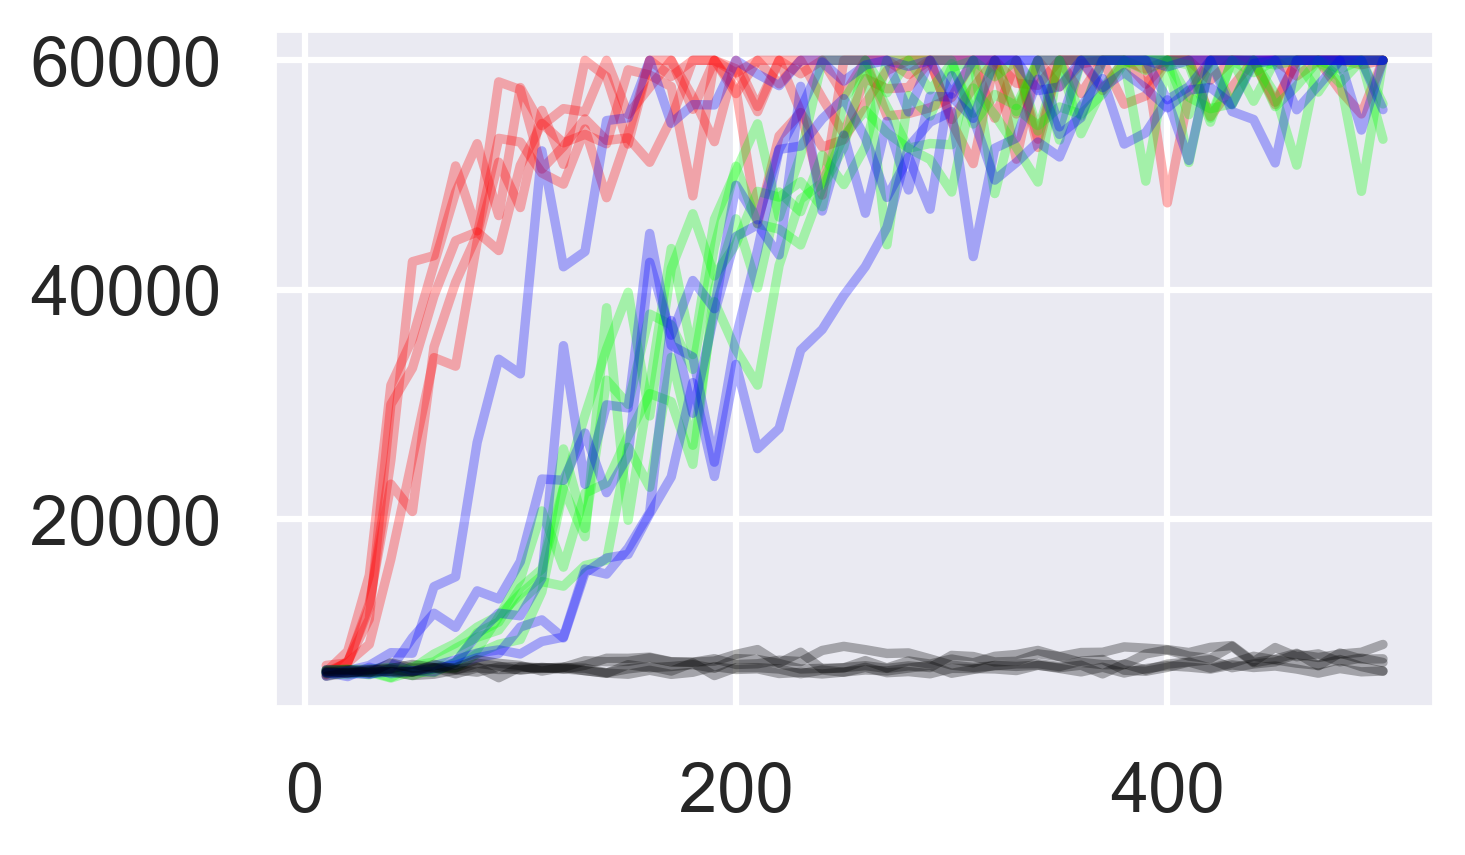

In [4]:
plt.figure(figsize=(5, 3), dpi=300)

for i in range(5):
    plt.plot(steps, len_hs[i], color=(1, 0, 0, 0.3));
    
for i in range(5):
    plt.plot(steps, len_hb[i], color=(0, 1, 0, 0.3));
    
for i in range(5):
    plt.plot(steps, len_h[i], color=(0, 0, 1, 0.3));
    
for i in range(5):
    plt.plot(steps, len_o[i], color=(0, 0, 0, 0.3));

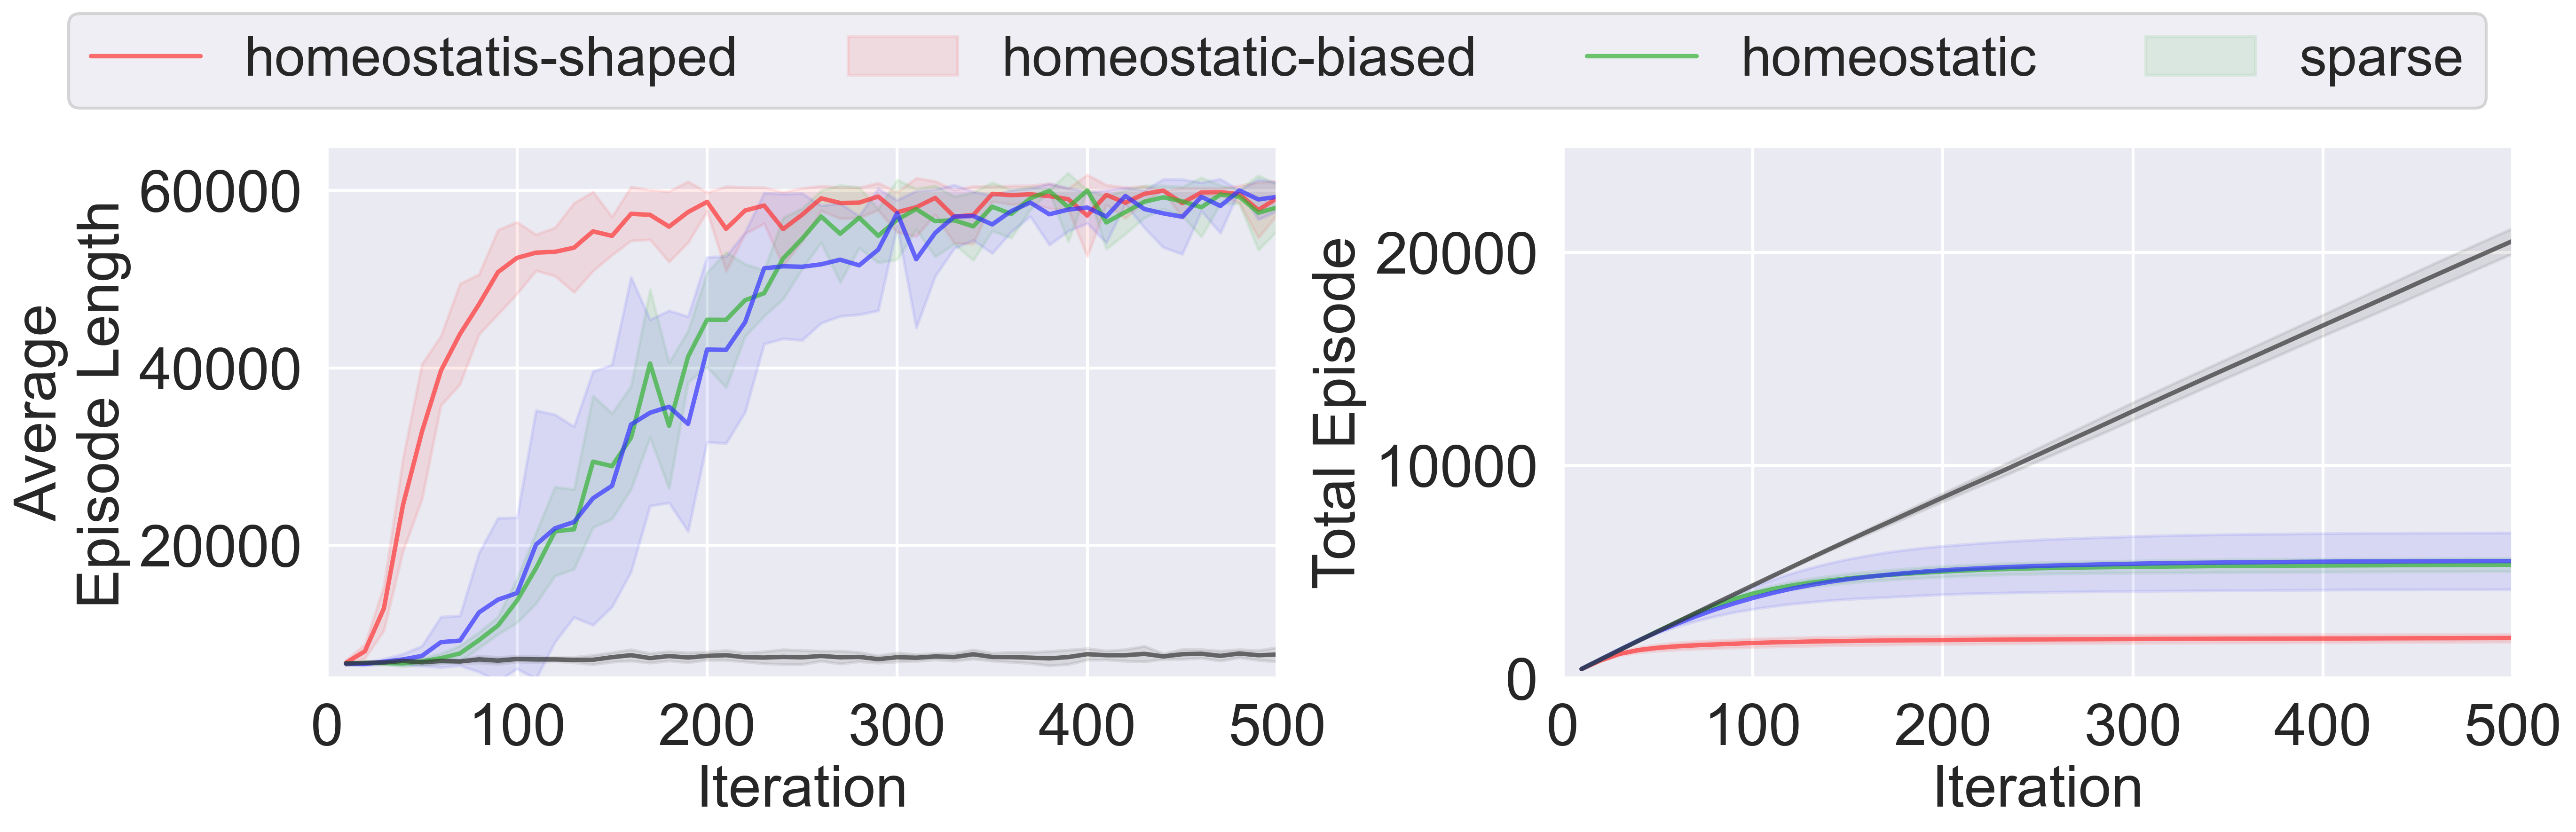

In [5]:
fig = plt.figure(figsize=(20, 5), dpi=300)
font_size = 30

def plot_with_std(data, color):
    mean_ = np.mean(data, axis=0)
    std_ = np.std(data, axis=0)
    
    plt.plot(steps, mean_, color=color);
    c = [c for c in color]
    c[3] = 0.1
    plt.fill_between(steps, mean_ - std_, mean_ + std_, color = c)

plt.subplot(1,2,1)
base = 0.2
plot_with_std(len_hs, (1, base, base, 0.7))
plot_with_std(len_hb, (base, 0.7, base, 0.7))
plot_with_std(len_h, (base, base, 1, 0.7))
plot_with_std(len_o, (base, base, base, 0.7))
plt.ylim([5000, 65000])
plt.xlim([0, 500])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Average\n Episode Length', fontsize=font_size)    
plt.tick_params(labelsize=font_size)

plt.subplot(1,2,2)
base = 0.2
plot_with_std(eps_hs, (1, base, base, 0.7))
plot_with_std(eps_hb, (base, 0.7, base, 0.7))
plot_with_std(eps_h, (base, base, 1, 0.7))
plot_with_std(eps_o, (base, base, base, 0.7))
plt.xlim([0, 500])
plt.ylim([0, 25000])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Total Episode', fontsize=font_size)
plt.tick_params(labelsize=font_size)

plt.subplots_adjust(wspace=0.3)

plt.legend(["homeostatis-shaped", "homeostatic-biased", "homeostatic", "sparse"],
           bbox_to_anchor=(-0.3, 1.3), loc='upper center', ncol=4, prop={'size': 28})


# plt.legend(["homeostatis-shaped", "homeostatic-biased", "homeostatic", "cart-pole"],
#            bbox_to_anchor=(-0.15, -0.36), loc='lower center', ncol=4, prop={'size': 20})

plt.savefig("trp_results.png", bbox_inches='tight')

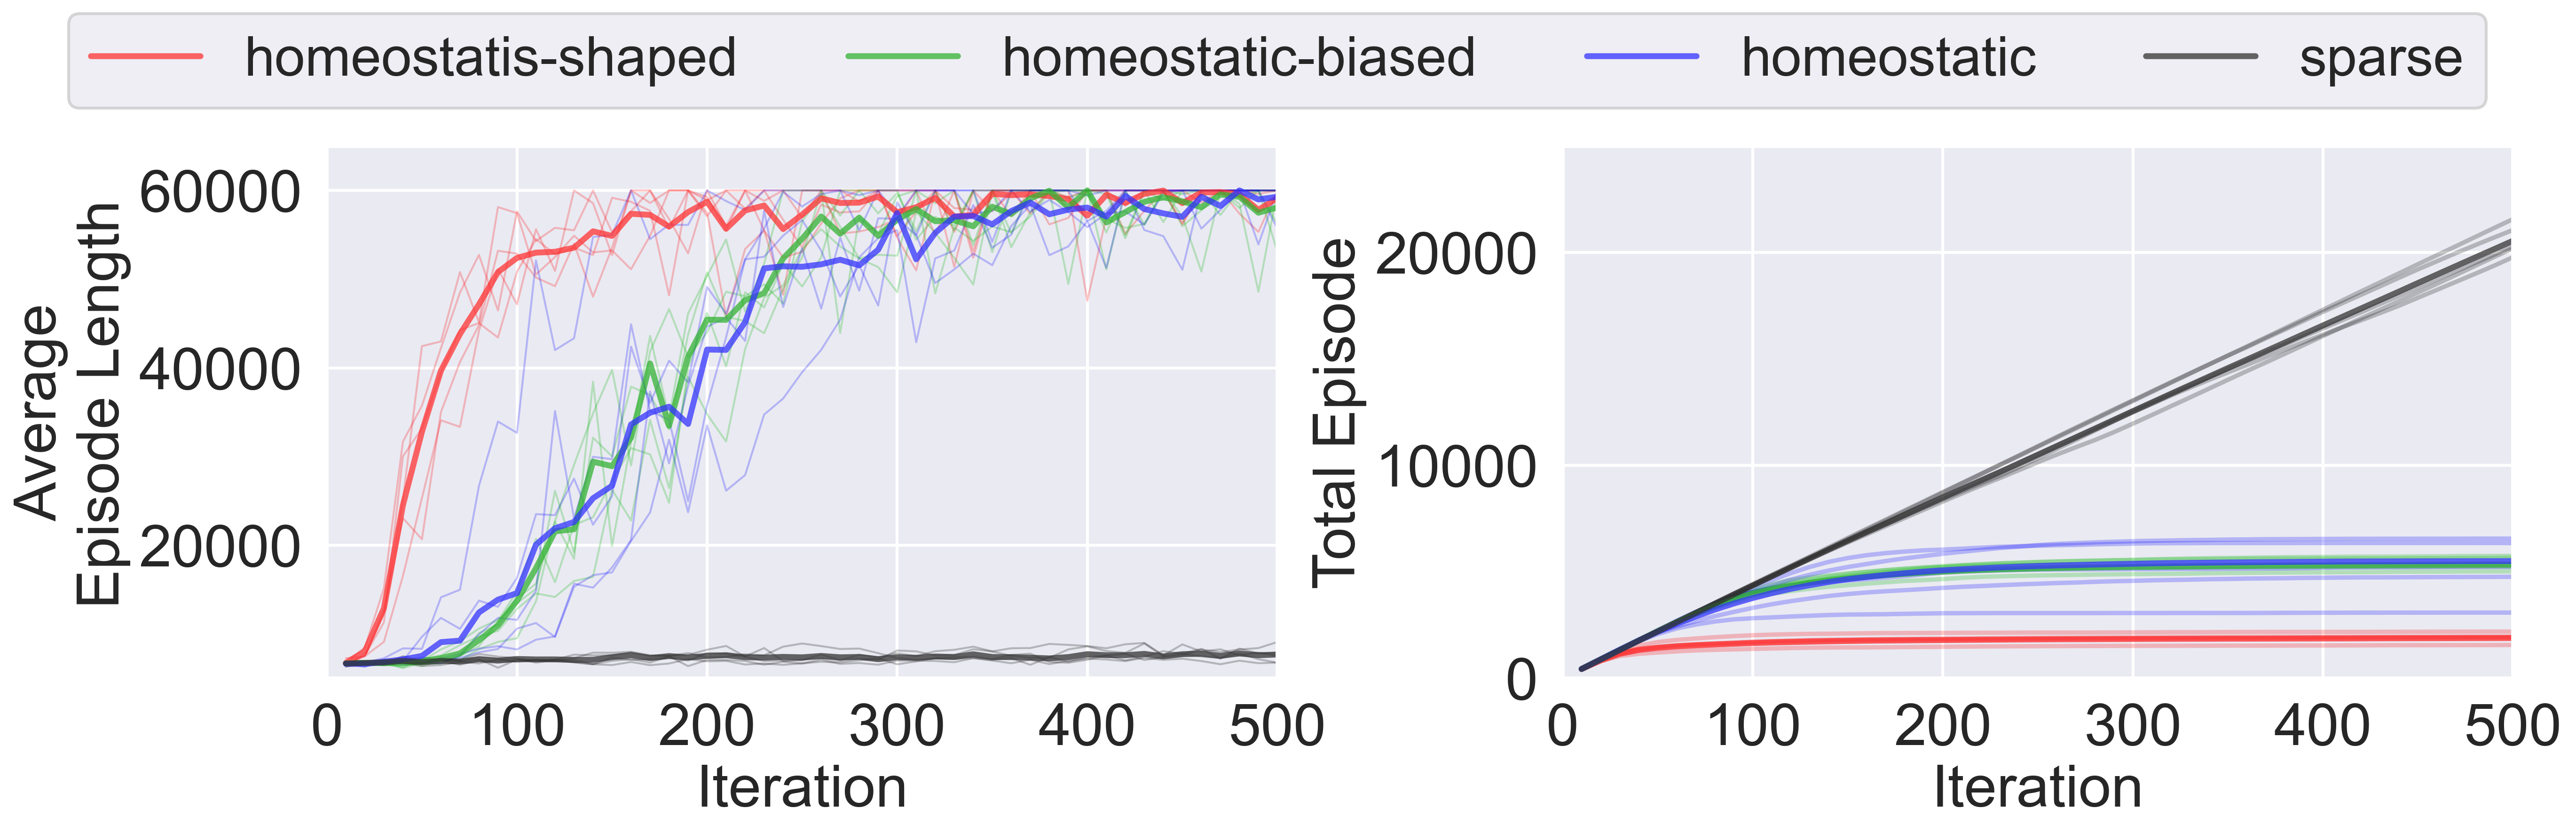

In [6]:
fig = plt.figure(figsize=(20, 5), dpi=300)
font_size = 30

alpha = 0.23
mean_alpha = 0.75

def plot_mean(data, color):
    mean_ = np.mean(data, axis=0)
    plt.plot(steps, mean_, color=color, linewidth=3);

plt.subplot(1,2,1)
base = 0.2
for i in range(5):
    plt.plot(steps, len_hs[i], color=(1, 0, 0, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, len_hb[i], color=(0, 0.7, 0, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, len_h[i], color=(0, 0, 1, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, len_o[i], color=(0, 0, 0, alpha), linewidth=1, label='_nolegend_');

plot_mean(len_hs, (1, base, base, mean_alpha))
plot_mean(len_hb, (base, 0.7, base, mean_alpha))
plot_mean(len_h, (base, base, 1, mean_alpha))
plot_mean(len_o, (base, base, base, mean_alpha))
plt.ylim([5000, 65000])
plt.xlim([0, 500])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Average\n Episode Length', fontsize=font_size)    
plt.tick_params(labelsize=font_size)

plt.subplot(1,2,2)
base = 0.2
for i in range(5):
    plt.plot(steps, eps_hs[i], color=(1, 0, 0, alpha), label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, eps_hb[i], color=(0, 0.7, 0, alpha), label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, eps_h[i], color=(0, 0, 1, alpha), label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, eps_o[i], color=(0, 0, 0, alpha), label='_nolegend_');

plot_mean(eps_hs, (1, base, base, mean_alpha))
plot_mean(eps_hb, (base, 0.7, base, mean_alpha))
plot_mean(eps_h, (base, base, 1, mean_alpha))
plot_mean(eps_o, (base, base, base, mean_alpha))
plt.xlim([0, 500])
plt.ylim([0, 25000])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Total Episode', fontsize=font_size)
plt.tick_params(labelsize=font_size)

plt.subplots_adjust(wspace=0.3)

plt.legend(["homeostatis-shaped", "homeostatic-biased", "homeostatic", "sparse"],
           bbox_to_anchor=(-0.3, 1.3), loc='upper center', ncol=4, prop={'size': 28})


# plt.legend(["homeostatis-shaped", "homeostatic-biased", "homeostatic", "cart-pole"],
#            bbox_to_anchor=(-0.15, -0.36), loc='lower center', ncol=4, prop={'size': 20})

plt.savefig("trp_results_ind.pdf", bbox_inches='tight')

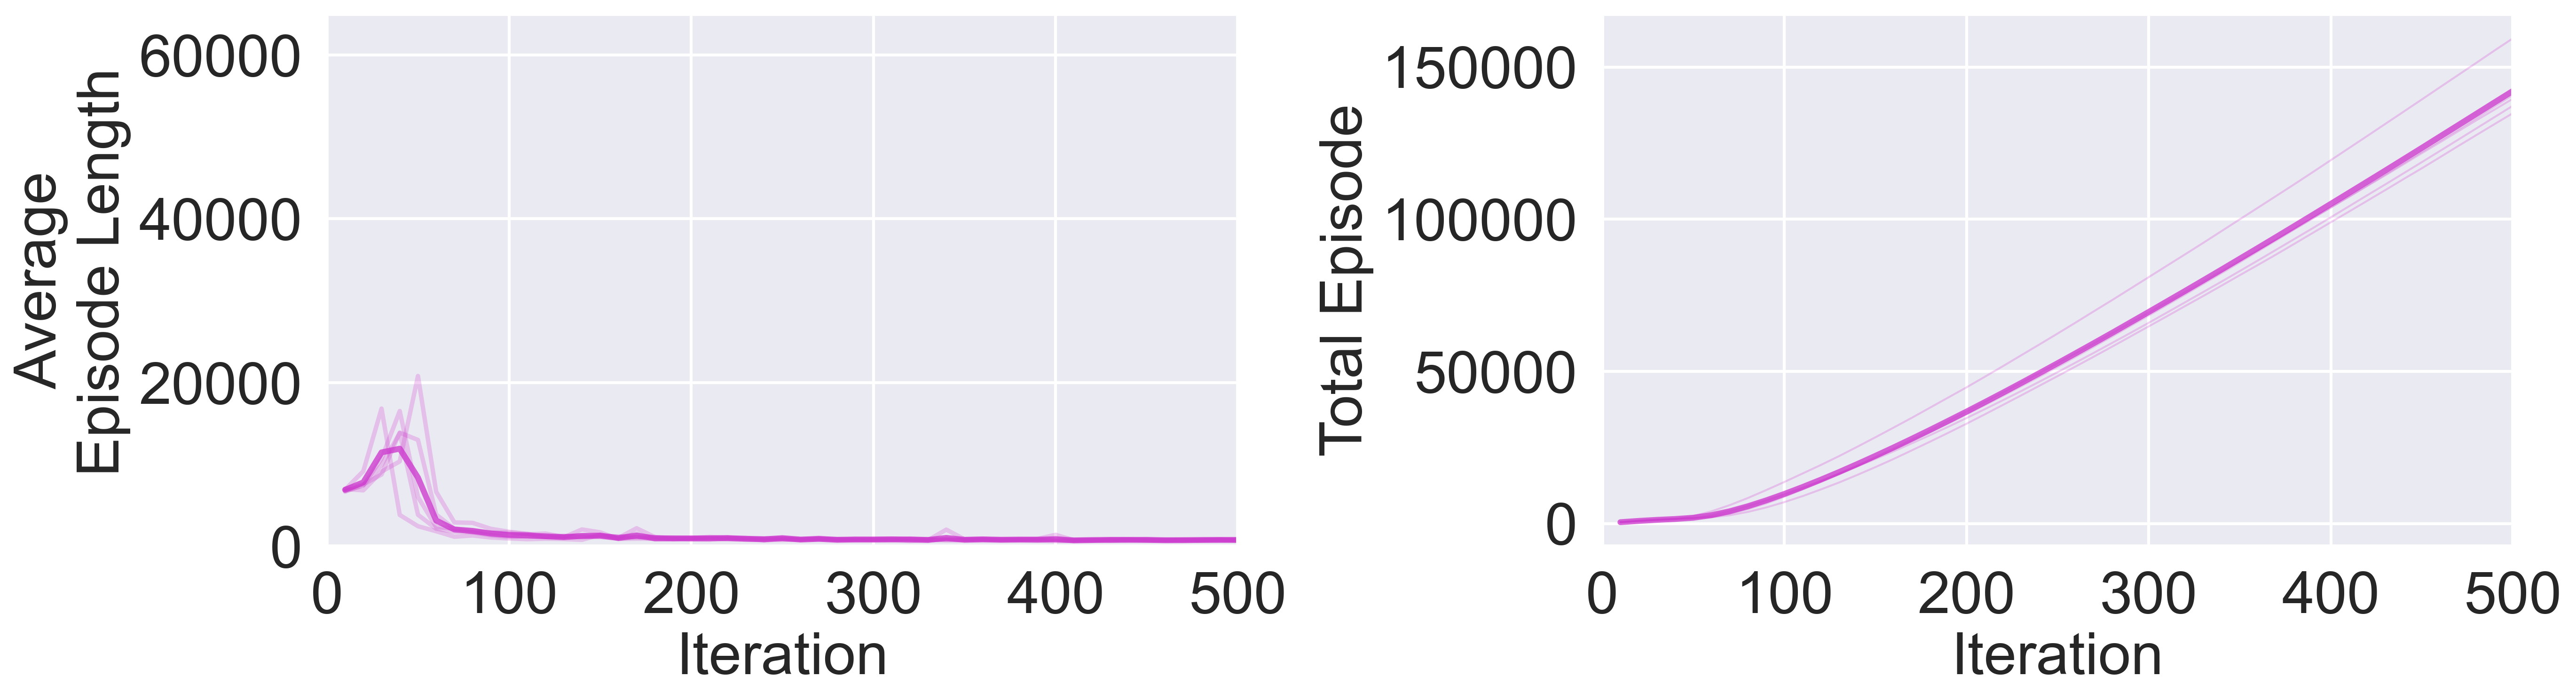

In [7]:
fig = plt.figure(figsize=(20, 5), dpi=300)
font_size = 30

plt.subplot(1,2,1)
base = 0.2
for i in range(5):
    plt.plot(steps, len_g[i], color=(0.8, base, 0.8, alpha));

plot_mean(len_g, (0.8, base, 0.8, mean_alpha))
plt.xlim([0, 500])
plt.ylim([0, 65000])

plt.xlabel('Iteration', fontsize = font_size)
plt.ylabel('Average\n Episode Length', fontsize = font_size)  
plt.tick_params(labelsize=font_size)

plt.subplot(1,2,2)
base = 0.2
for i in range(5):
    plt.plot(steps, eps_g[i], color=(0.8, base, 0.8, alpha), linewidth=1, label='_nolegend_');

plot_mean(eps_g, (0.8, base, 0.8, mean_alpha))

plt.xlim([0, 500])

plt.xlabel('Iteration', fontsize = font_size)
plt.ylabel('Total Episode', fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.subplots_adjust(wspace=0.4)

plt.savefig("trp_fc_result_ind2.pdf", bbox_inches='tight')

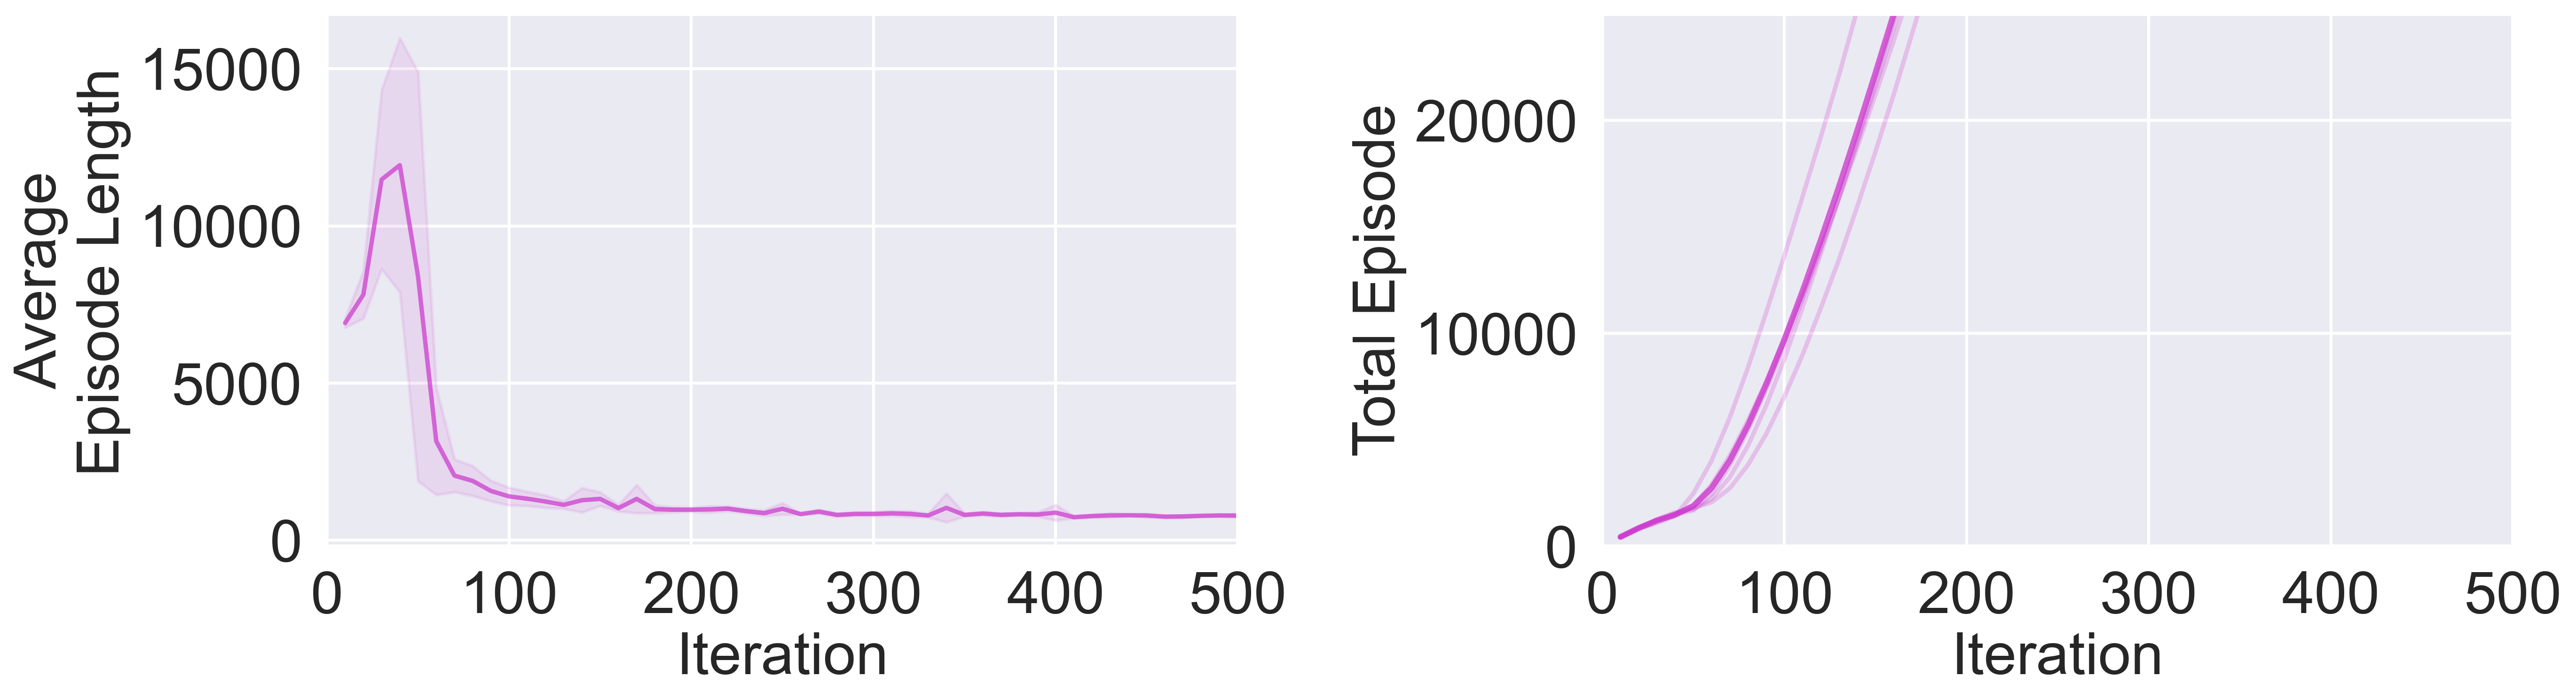

In [8]:
fig = plt.figure(figsize=(20, 5), dpi=300)
font_size = 30

plt.subplot(1,2,1)
base = 0.2
plot_with_std(len_g, (0.8, base, 0.8, 0.7))

plt.xlim([0, 500])

plt.xlabel('Iteration', fontsize = font_size)
plt.ylabel('Average\n Episode Length', fontsize = font_size)   
plt.tick_params(labelsize=font_size)

plt.subplot(1,2,2)
for i in range(5):
    plt.plot(steps, eps_g[i], color=(0.8, base, 0.8, alpha));

plot_mean(eps_g, (0.8, base, 0.8, mean_alpha))
plt.xlim([0, 500])
plt.ylim([0, 25000])

plt.xlim([0, 500])
#plt.ylim([0, 25000])

plt.xlabel('Iteration', fontsize = font_size)
plt.ylabel('Total Episode', fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.subplots_adjust(wspace=0.4)


# plt.legend(["food-collection"],
#            bbox_to_anchor=(-0.15, -0.4), loc='lower center', ncol=4, prop={'size': 20})

plt.savefig("trp_fc_result.png", bbox_inches='tight')

# Thermal の結果をプロット

In [8]:
api = wandb.Api()
entity, project = "ugo-nama-kun", "thermal_wo_shade"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

# keys = [
#     "homeostatic_shaped-Aug31",
#     "homeostatic_biased-Sep1",
#     "homeostatic-Sep1",
#     "one-Sep1",
# ]

keys_th = [
    "homeostatic_shaped-Oct4",
    "homeostatic_biased-Oct4",
    "homeostatic-Oct4",
    "one-Oct4",
]

results_length = {k: [] for k in keys_th}
results_episode = {k: [] for k in keys_th}

def get_result(run):
    length = []
    episode = []
    steps = []

    for i, row in run.history(keys=["length_mean"]).iterrows():
        steps.append(row["_step"])
        length.append(row["length_mean"])

    for i, row in run.history(keys=["episodes"]).iterrows():
        episode.append(row["episodes"])
    
    return steps, length, episode

steps = None
for run in runs:
    if run.state == "finished":
        try:
            if run.group in keys_th:
                steps, length, episode = get_result(run)
                results_length[run.group].append(length)
                results_episode[run.group].append(episode)
        except KeyError:
            continue


len_th_hs = np.array(results_length[keys_th[0]])
len_th_hb = np.array(results_length[keys_th[1]])
len_th_h = np.array(results_length[keys_th[2]])
len_th_o = np.array(results_length[keys_th[3]])

eps_th_hs = np.array(results_episode[keys_th[0]])
eps_th_hb = np.array(results_episode[keys_th[1]])
eps_th_h = np.array(results_episode[keys_th[2]])
eps_th_o = np.array(results_episode[keys_th[3]])

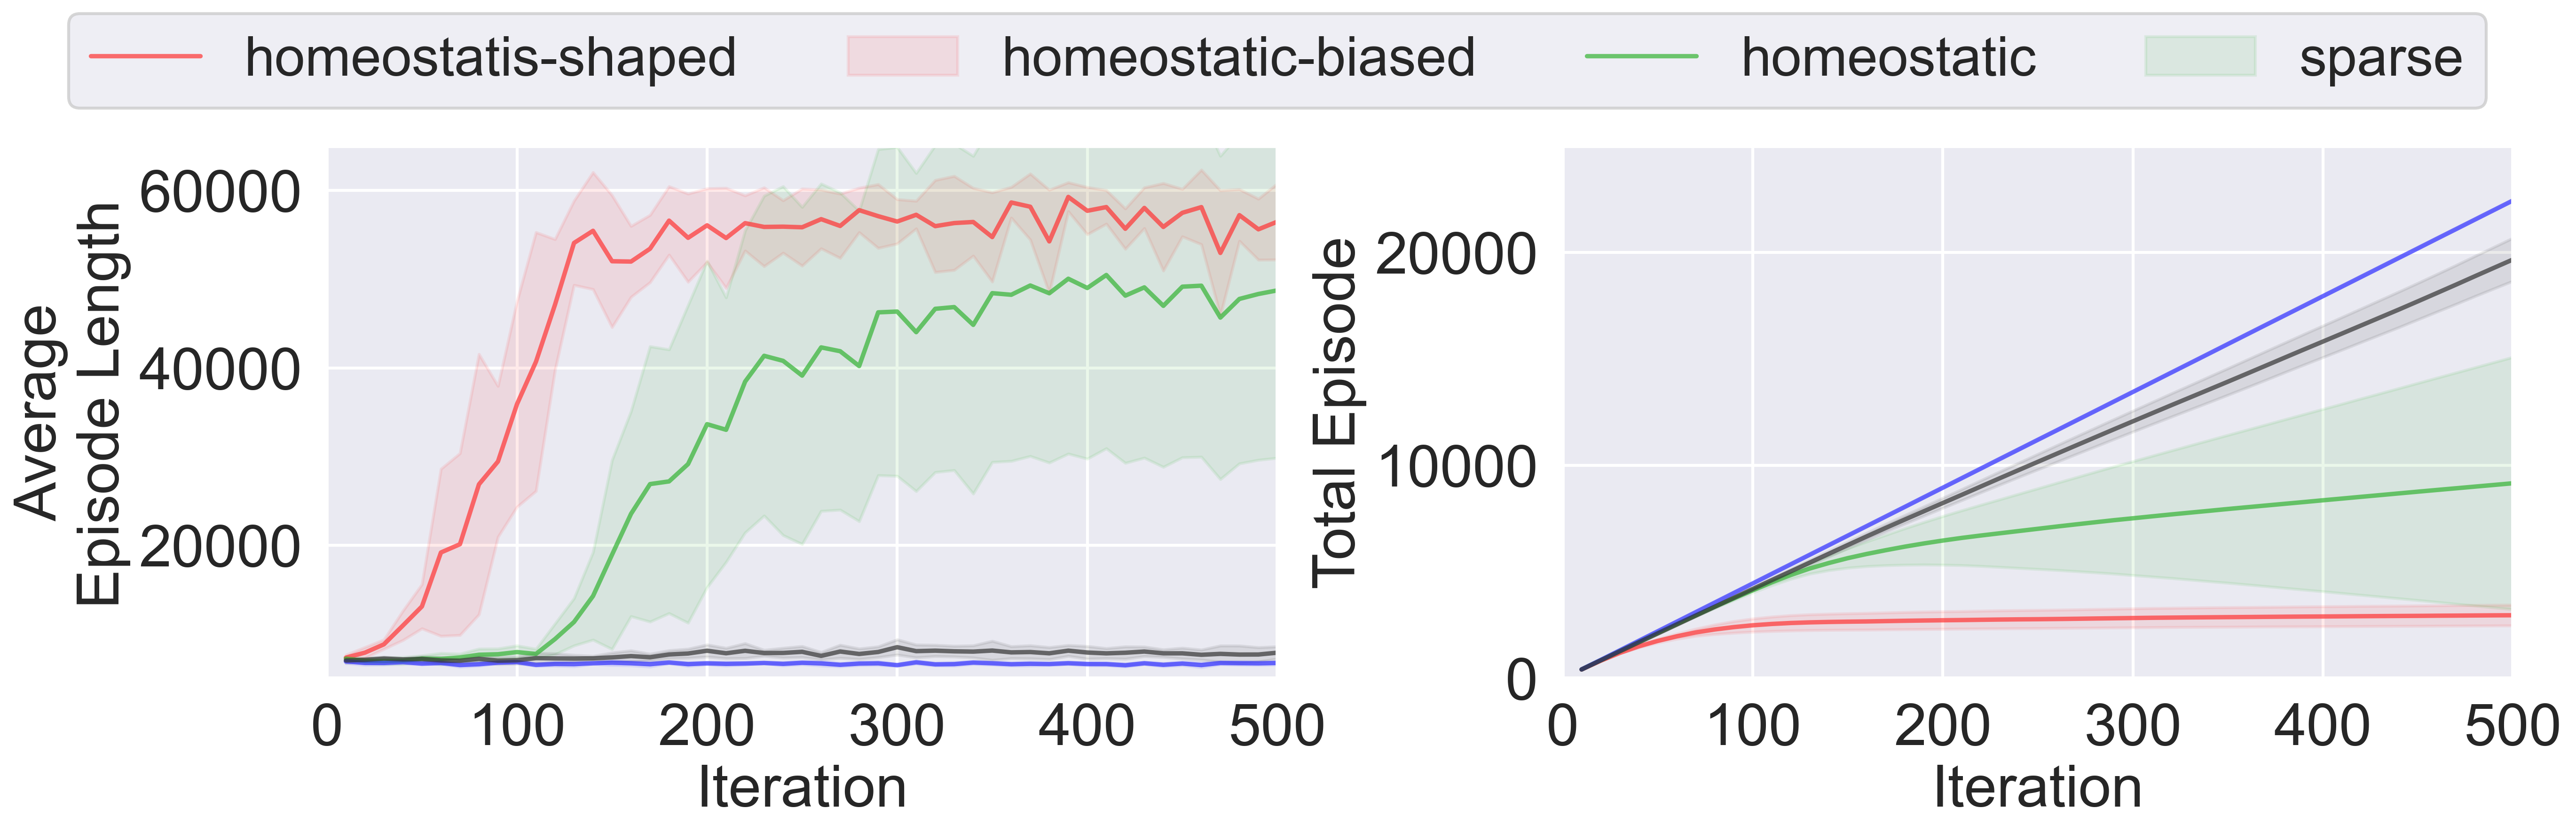

In [9]:
fig = plt.figure(figsize=(20, 5), dpi=300)
font_size = 30


def plot_with_std(data, color):
    mean_ = np.mean(data, axis=0)
    std_ = np.std(data, axis=0)
    
    plt.plot(steps, mean_, color=color);
    c = [c for c in color]
    c[3] = 0.1
    plt.fill_between(steps, mean_ - std_, mean_ + std_, color = c)

plt.subplot(1,2,1)
base = 0.2
plot_with_std(len_th_hs, (1, base, base, 0.7))
plot_with_std(len_th_hb, (base, 0.7, base, 0.7))
plot_with_std(len_th_h, (base, base, 1, 0.7))
plot_with_std(len_th_o, (base, base, base, 0.7))
plt.ylim([5000, 65000])
plt.xlim([0, 500])


plt.xlabel('Iteration', fontsize = font_size)
plt.ylabel('Average\n Episode Length', fontsize = font_size)   
plt.tick_params(labelsize=font_size) 

plt.subplot(1,2,2)
base = 0.2
plot_with_std(eps_th_hs, (1, base, base, 0.7))
plot_with_std(eps_th_hb, (base, 0.7, base, 0.7))
plot_with_std(eps_th_h, (base, base, 1, 0.7))
plot_with_std(eps_th_o, (base, base, base, 0.7))
plt.xlim([0, 500])
plt.ylim([0, 25000])

plt.xlabel('Iteration', fontsize = font_size)
plt.ylabel('Total Episode', fontsize = font_size)
plt.tick_params(labelsize=font_size)
plt.subplots_adjust(wspace=0.3)

# plt.legend(["homeostatis-shaped", "homeostatic-biased", "homeostatic", "cart-pole"],
#            bbox_to_anchor=(-0.15, -0.36), loc='lower center', ncol=4, prop={'size': 20})

plt.legend(["homeostatis-shaped", "homeostatic-biased", "homeostatic", "sparse"],
           bbox_to_anchor=(-0.3, 1.3), loc='upper center', ncol=4, prop={'size': 28})

plt.savefig("thermal_results.png", bbox_inches='tight')

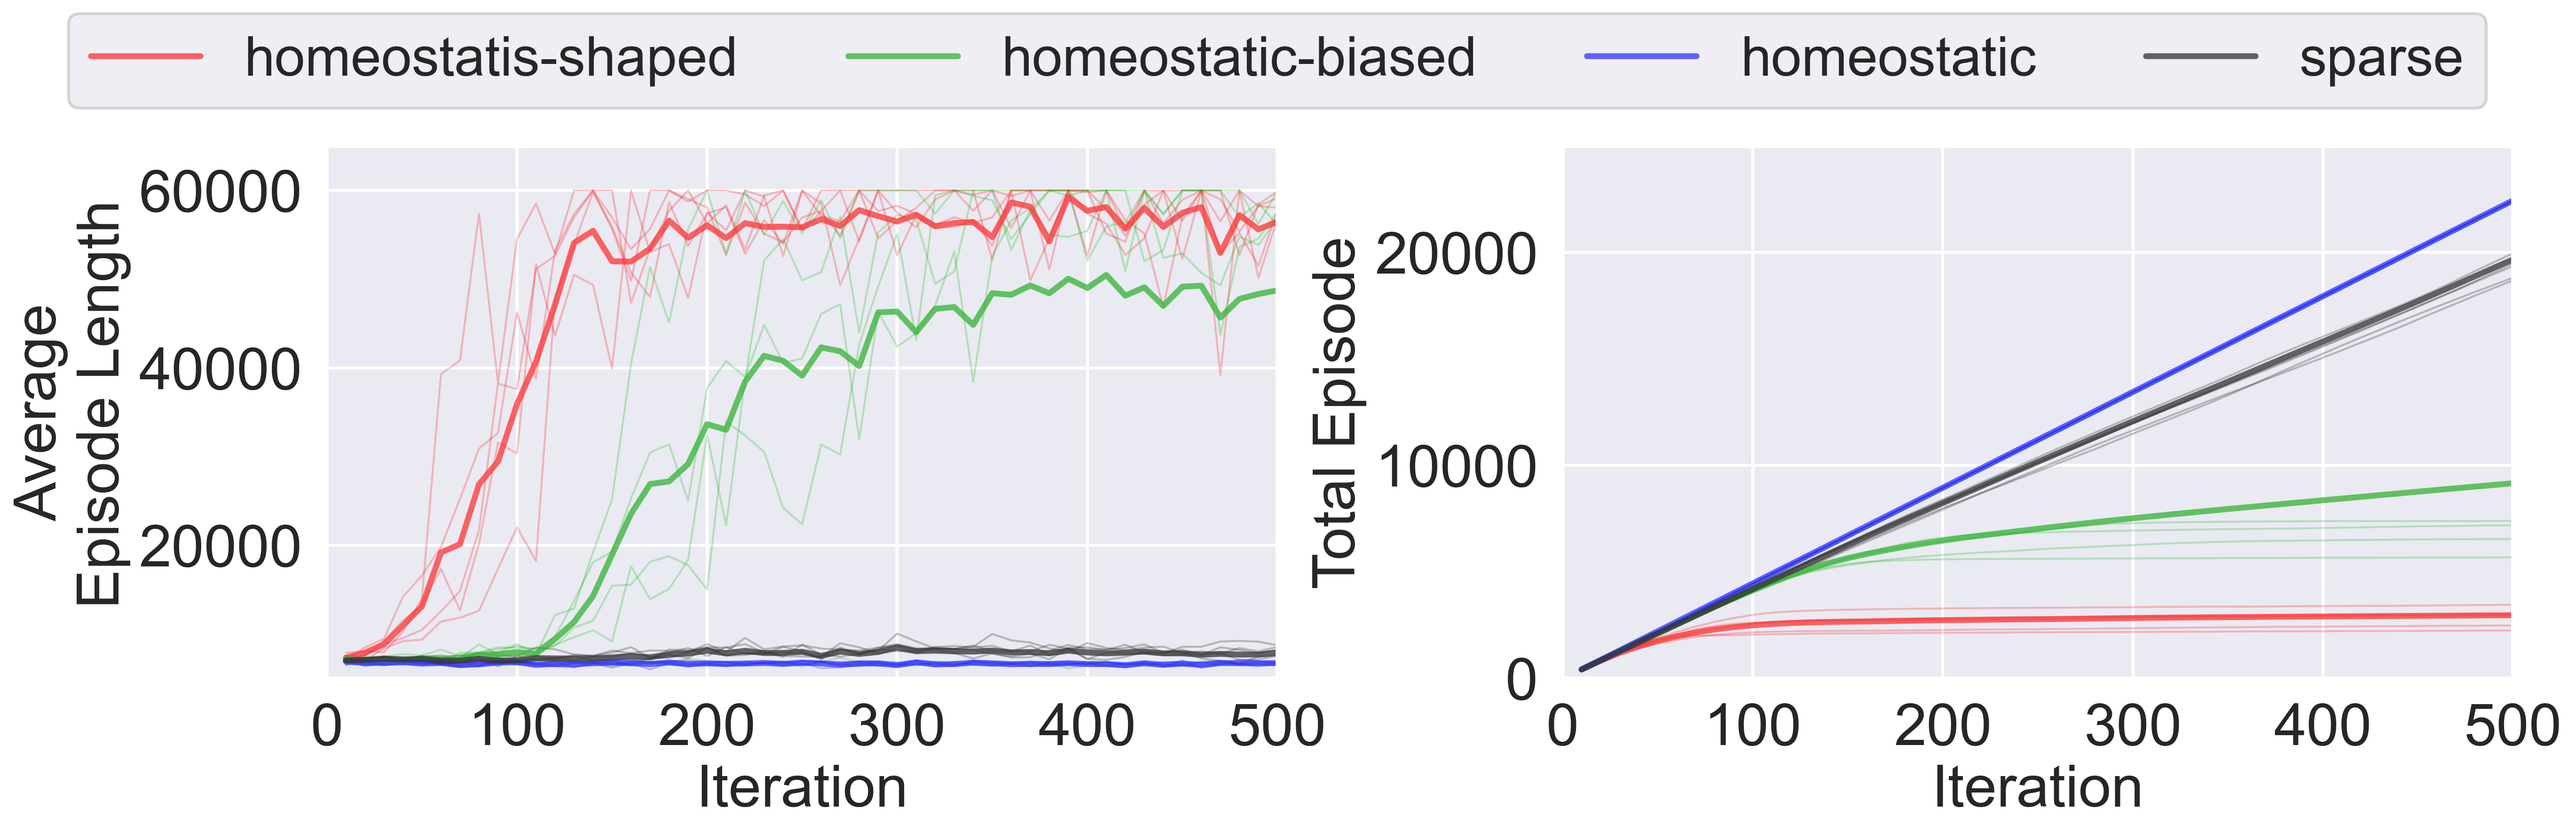

In [10]:
fig = plt.figure(figsize=(20, 5), dpi=300)
font_size = 30

alpha = 0.23
mean_alpha = 0.75

def plot_mean(data, color):
    mean_ = np.mean(data, axis=0)
    plt.plot(steps, mean_, color=color, linewidth=3);

plt.subplot(1,2,1)
base = 0.2
for i in range(5):
    plt.plot(steps, len_th_hs[i], color=(1, 0, 0, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, len_th_hb[i], color=(0, 0.7, 0, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, len_th_h[i], color=(0, 0, 1, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, len_th_o[i], color=(0, 0, 0, alpha), linewidth=1, label='_nolegend_');

plot_mean(len_th_hs, (1, base, base, mean_alpha))
plot_mean(len_th_hb, (base, 0.7, base, mean_alpha))
plot_mean(len_th_h, (base, base, 1, mean_alpha))
plot_mean(len_th_o, (base, base, base, mean_alpha))
plt.ylim([5000, 65000])
plt.xlim([0, 500])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Average\n Episode Length', fontsize=font_size)    
plt.tick_params(labelsize=font_size)

plt.subplot(1,2,2)
base = 0.2
for i in range(5):
    plt.plot(steps, eps_th_hs[i], color=(1, 0, 0, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, eps_th_hb[i], color=(0, 0.7, 0, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, eps_th_h[i], color=(0, 0, 1, alpha), linewidth=1, label='_nolegend_');
    
for i in range(5):
    plt.plot(steps, eps_th_o[i], color=(0, 0, 0, alpha), linewidth=1, label='_nolegend_');

plot_mean(eps_th_hs, (1, base, base, mean_alpha))
plot_mean(eps_th_hb, (base, 0.7, base, mean_alpha))
plot_mean(eps_th_h, (base, base, 1, mean_alpha))
plot_mean(eps_th_o, (base, base, base, mean_alpha))
plt.xlim([0, 500])
plt.ylim([0, 25000])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Total Episode', fontsize=font_size)
plt.tick_params(labelsize=font_size)

plt.subplots_adjust(wspace=0.3)

plt.legend(["homeostatis-shaped", "homeostatic-biased", "homeostatic", "sparse"],
           bbox_to_anchor=(-0.3, 1.3), loc='upper center', ncol=4, prop={'size': 28})

plt.savefig("thermal_results_ind.pdf", bbox_inches='tight')

# Vision TRP の結果をプロット

In [17]:
api = wandb.Api()
entity, project = "ugo-nama-kun", "vision_trp"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

keys_th = [
    "homeostatic_shaped-Nov26"
]

names = []
results_length = {k: [] for k in keys_th}
results_episode = {k: [] for k in keys_th}

def get_result(run):
    length = []
    episode = []
    steps = []

    for i, row in run.history(keys=["length_mean"]).iterrows():
        steps.append(row["_step"])
        length.append(row["length_mean"])

    for i, row in run.history(keys=["episodes"]).iterrows():
        episode.append(row["episodes"])
    
    return steps, length, episode

steps = None
for run in runs:
    if run.state == "finished":
        try:
            if run.group in keys_th:
                names.append(run.name)
                steps, length, episode = get_result(run)
                results_length[run.group].append(length)
                results_episode[run.group].append(episode)
        except KeyError:
            continue


len_v = np.array(results_length[keys_th[0]])
eps_v = np.array(results_episode[keys_th[0]])
print(names)

['run-2021-12-06-16-42-28', 'run-2021-12-02-10-54-22', 'run-2021-12-01-15-36-05', 'run-2021-11-26-14-38-38', 'run-2021-11-26-14-16-12', 'run-2021-11-26-14-13-12']


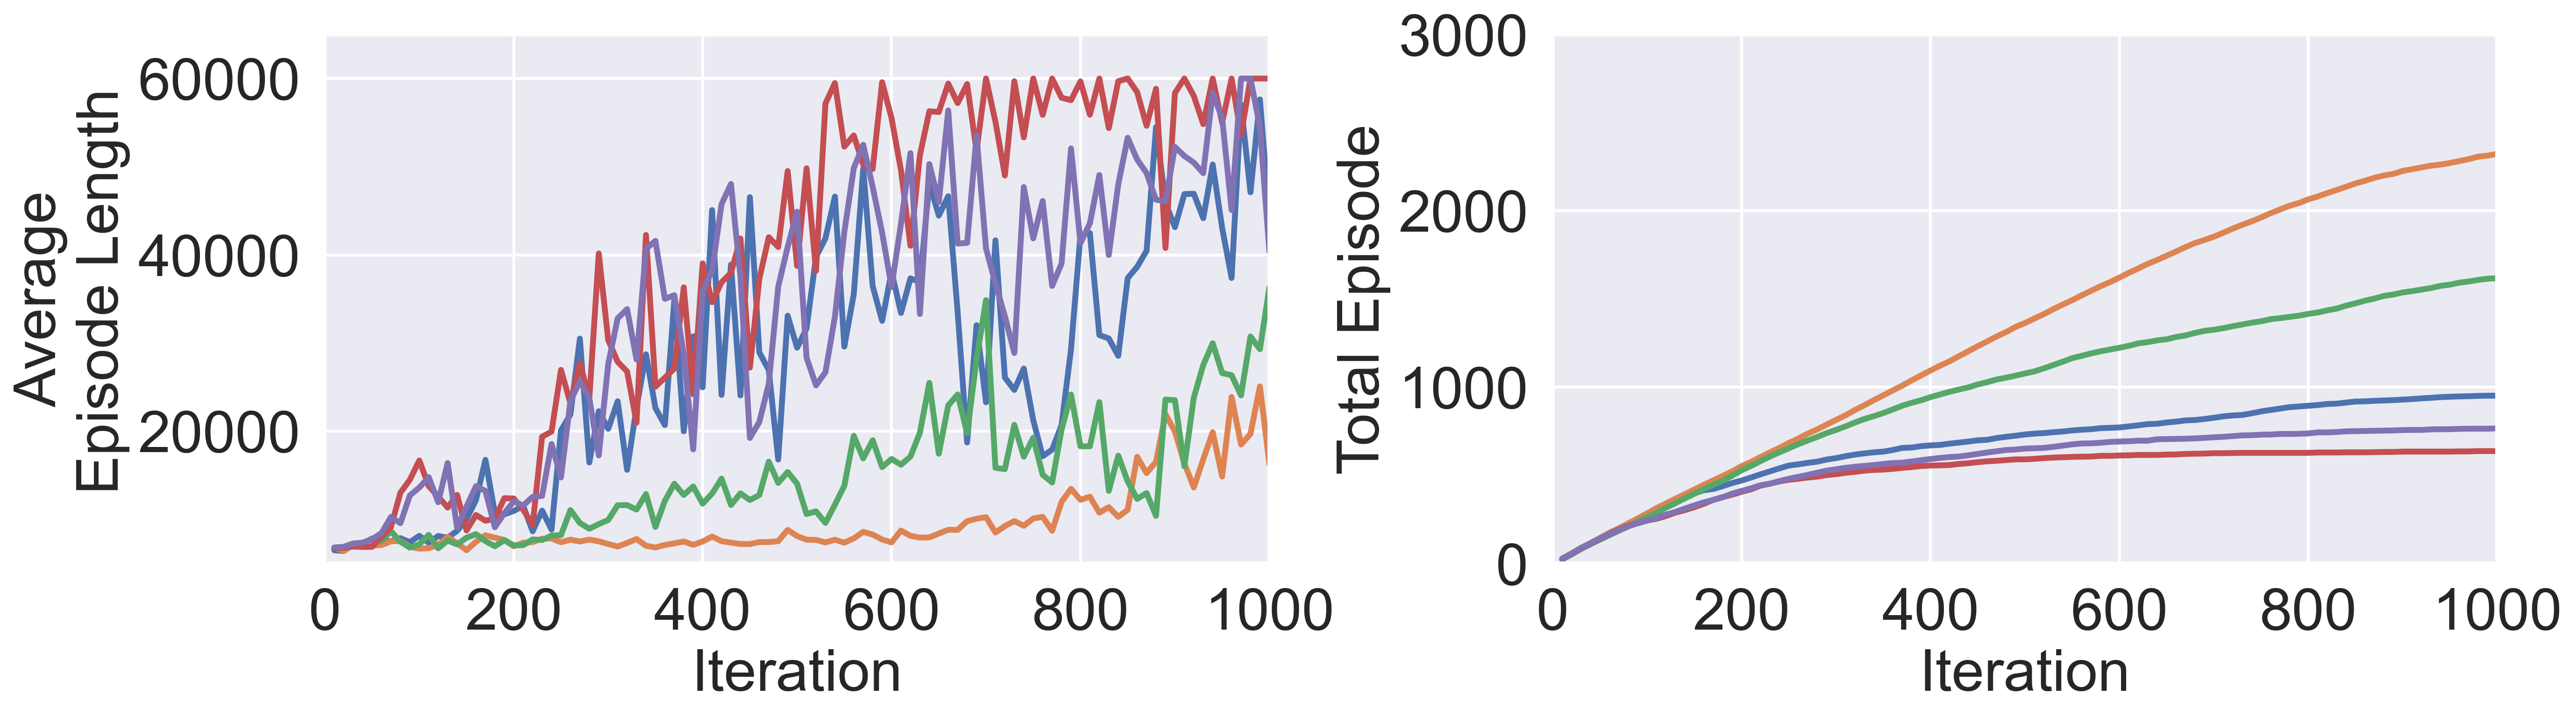

In [18]:
fig = plt.figure(figsize=(20, 5), dpi=300)
font_size = 30

alpha = 0.23
mean_alpha = 0.95

plt.subplot(1,2,1)
base = 0.2
for i in range(5):
    plt.plot(steps, len_v[i+1], linewidth=3, label='_nolegend_');
    
plt.xlim([0, 1000])
plt.ylim([5000, 65000])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Average\n Episode Length', fontsize=font_size)    
plt.tick_params(labelsize=font_size)

plt.subplot(1,2,2)
for i in range(5):
    plt.plot(steps, eps_v[i+1], linewidth=3, label='_nolegend_');
    
plt.xlim([0, 1000])
plt.ylim([0, 3000])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Total Episode', fontsize=font_size)
plt.tick_params(labelsize=font_size)

plt.subplots_adjust(wspace=0.3)

plt.savefig("vision_results_ind.png", bbox_inches='tight')

# Vision-TRP-developmental のプロット

In [2]:
api = wandb.Api()
entity, project = "ugo-nama-kun", "vision_trp"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

keys_th = [
    "homeostatic_shaped-Dec25-devel"
]

names = []
results_length = {k: [] for k in keys_th}
results_episode = {k: [] for k in keys_th}

def get_result(run):
    length = []
    episode = []
    steps = []

    for i, row in run.history(keys=["length_mean"]).iterrows():
        steps.append(row["_step"])
        length.append(row["length_mean"])

    for i, row in run.history(keys=["episodes"]).iterrows():
        episode.append(row["episodes"])
    
    return steps, length, episode

steps = None
for run in runs:
    if run.state == "finished":
        try:
            if run.group in keys_th:
                names.append(run.name)
                steps, length, episode = get_result(run)
                results_length[run.group].append(length)
                results_episode[run.group].append(episode)
        except KeyError:
            continue


len_v = np.array(results_length[keys_th[0]])
eps_v = np.array(results_episode[keys_th[0]])
print(names)

['run-2021-12-25-12-29-13']


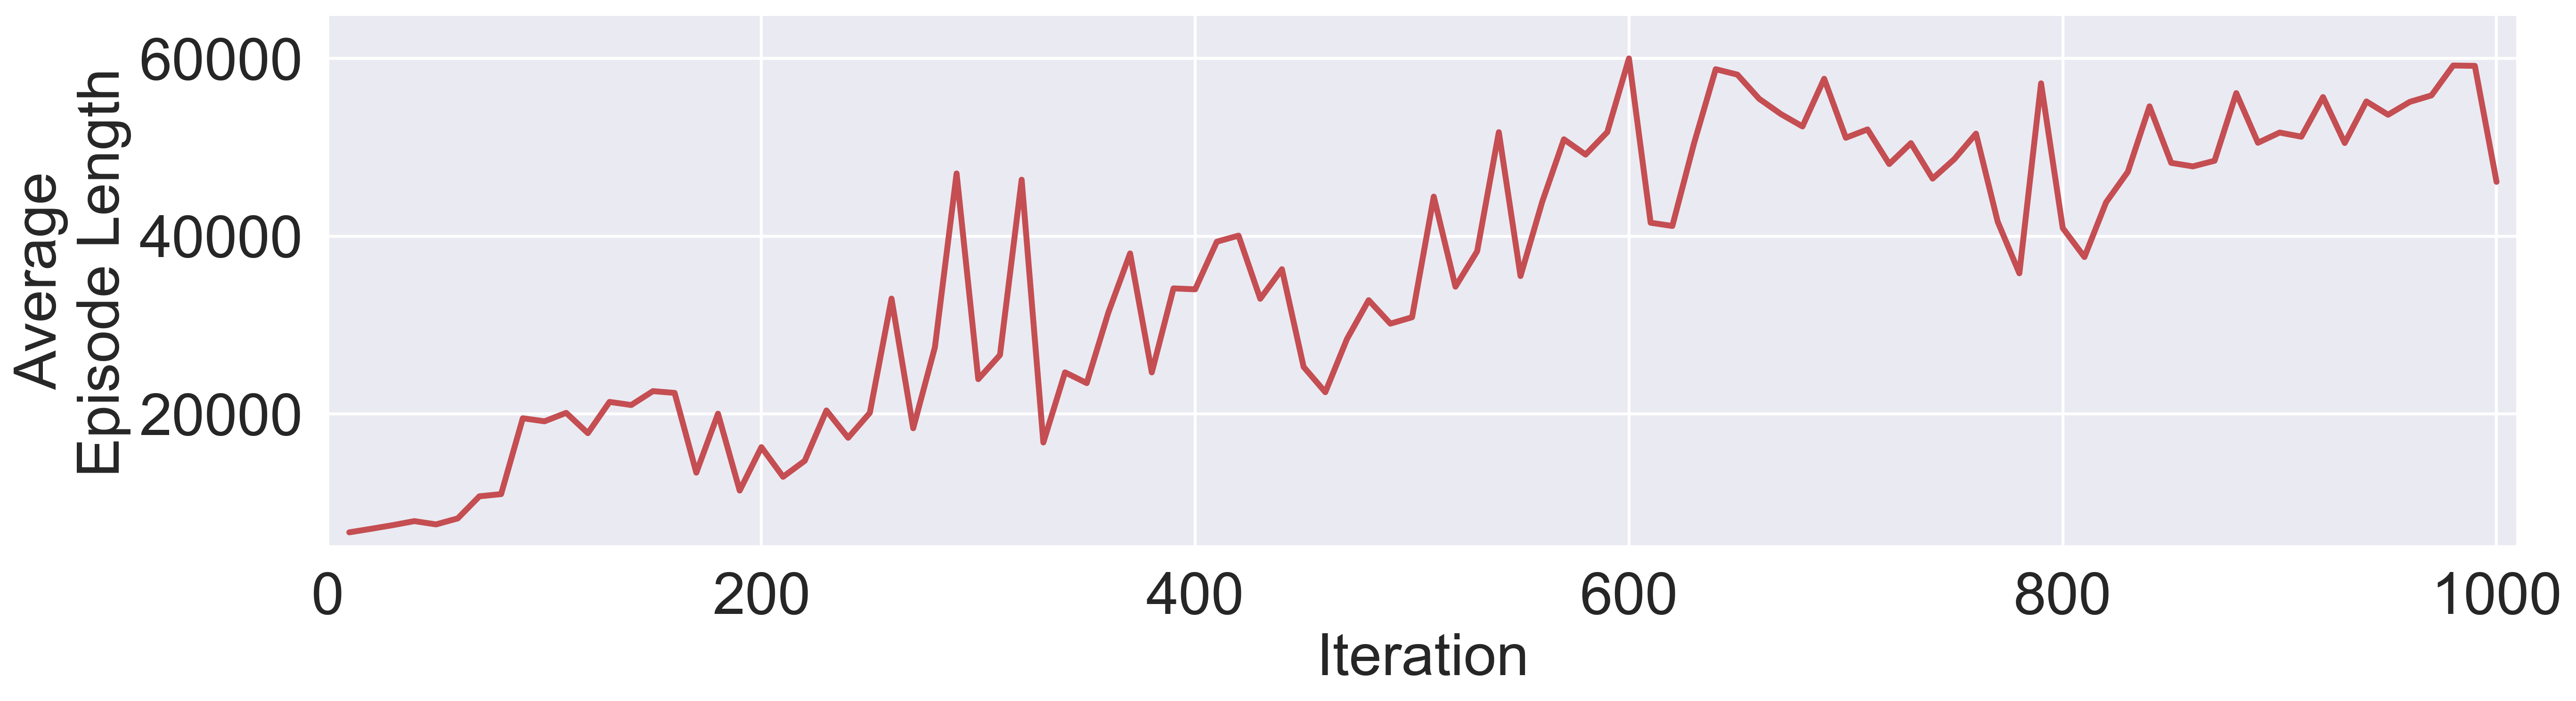

In [4]:
fig = plt.figure(figsize=(20, 5), dpi=300)
font_size = 30

base = 0.2
plt.plot(steps, len_v[0], linewidth=3, label='_nolegend_', c="r")
#plt.scatter(steps[9::10], len_v[0][9::10], c="r", s=200)
    
plt.xlim([0, 1010])
plt.ylim([5000, 65000])

plt.xlabel('Iteration', fontsize=font_size)
plt.ylabel('Average\n Episode Length', fontsize=font_size)    
plt.tick_params(labelsize=font_size)

plt.savefig("vision_results_devel.png", bbox_inches='tight')